# Features Preprocessing - Text columns

## Imports

### Libraries

In [4]:
import pandas as pd
import numpy as np 
import time 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.lib.deepreload import reload as dreload
pd.set_option("display.max_columns", 200, "display.max_rows", 200)

#Settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Data

In [3]:
df = pd.read_csv(r'C:\Users\Antoine\Coding Bootcamp\Open Food Facts\data_training_multi_pnns.csv', low_memory=False)

In [4]:
df.shape

(167890, 458)

In [5]:
#Product_name column
names = df[['product_name', 'pnns_groups_1']]
names

,product_name,pnns_groups_1
0,moutarde au moût de raisin,fat and sauces
1,Nectar d'abricot,beverages
2,Ratatouille à la provençale,composite foods
3,Nectar d'abricot,beverages
4,Ratatouille à la provençale,composite foods
...,...,...
167885,Nectar de mangue,beverages
167886,raviolis pekinois surgelés,composite foods
167887,Jus multifruits,beverages
167888,Compote à Boire Pomme Poire,fruits and vegetables


## Text processing

### Words Extraction

We first save all words present in the product_name column and clean the strings:

    - by removing unrelevant words
    - by removing unrelevant characters
Then, we count occurences and add most frequent words to a list. The interval 480-500 words refers to the number of most frequent words needed to represent pretty all the products in the dataset.

Finally, we create one empty column in the dataset for each word in the list, and fill every row with 1 if the word is present in the product_name, 0 else.

In [6]:
#Save words into a dataframe

#Save unique description
unique_names = list(names['product_name'].unique())
#Create empty dataframe
words_df = pd.DataFrame()
#Loop into the list, split words and append to words_df
for e in unique_names:
    words = str(e).lower().split(sep=' ')
    words_df = words_df.append(words)
words_df.columns = ['words']
words_df.describe()

,words
count,573489
unique,36316
top,de
freq,35478


In [7]:
#Convert words dataframe as a df with 2 cols : unique words and count of occurence
words_df = pd.DataFrame(words_df.value_counts()).reset_index()
words_df.columns = ['word', 'count']

In [8]:
#Drop unrelevant words and clean strings
words_to_drop = [
    'de', 'au', 'à', 'et', 'la', 'aux', '-', ' ', '&', 'le', 'du', 'en', 'sans', 'extra', 'mini', 'les', '4', '2', 'a', 'des', 'avec', '%', '6', '3', 'x', 'pour', '8', '/', '10', '12', '1', '5', 'di', '+', '20', ':', 'mon'
    ]
words_df['word'] = words_df['word'].apply(lambda x: x.strip('/').strip("'").strip('').strip(')'))
words_df = words_df[~words_df['word'].isin(words_to_drop)].reset_index(drop=True)
words_df[:100].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
word,chocolat,bio,lait,sauce,noir,poulet,fruits,beurre,pur,nature,jus,crème,pomme,jambon,citron,riz,saveur,fromage,confiture,blanc,yaourt,légumes,,vanille,pain,miel,caramel,pommes,fraise,noix,canard,saumon,sel,huile,coco,framboise,orange,petits,tomate,frais,petit,tranches,mg,thé,salade,fumé,foie,céréales,sirop,porc,goût,tomates,vert,thon,cacao,chocolate,fruit,filets,noisettes,entier,café,biscuits,pizza,d'olive,chips,moutarde,g,boisson,100%,soupe,amandes,terre,gras,filet,dessert,purée,rouges,blé,menthe,doux,pâte,chèvre,galettes,oeufs,olives,choco,cru,herbes,pépites,l'huile,cuit,emmental,boeuf,soja,pêche,pois,complet,basilic,graines,muesli
count,7523,6224,4831,3196,2812,2778,2658,2530,2493,2320,2254,2201,2150,2101,2071,2062,1990,1976,1875,1831,1802,1729,1682,1669,1546,1531,1458,1443,1402,1390,1364,1317,1219,1213,1175,1171,1146,1099,1097,1077,1067,1065,1046,1036,1035,1030,1012,992,988,981,976,970,959,929,927,917,916,913,909,894,891,891,882,880,878,866,862,853,841,809,804,780,770,760,758,734,729,726,717,717,710,707,694,691,690,662,660,659,651,649,641,634,633,630,629,626,623,617,612,607


In [9]:
#Save some of most frequent words in product_name column
words_to_add = list(words_df['word'][:522])
words_to_add.extend(['ml','kg','mg','cl'])
words_to_add.remove('g')
#Index 119 was empty ('')
del words_to_add[119]
#Sort words alphabetically
words_to_add = sorted(list(set(words_to_add)))
#Remove other unrelevant words
rem = [
    'yaourts', 'tomates', 'saveurs', 'saucisses', 'pâtes', 'framboises', 'chocolats', 'filets', 'fruits', 'fromages', 'galettes', 'fraises', 'barres', 'biscuits', 'amandes', 'st', '100', '100%', 'pommes', '0%', 'fourrées', '500', '7', '70%', 'al', 'and', 'cl', 'd', 'uht', 'l', 'ma', 'x2', 'with', 'mat'
    ]

#Update list
words_to_add = [e for e in words_to_add if e not in rem]
len(words_to_add)

488

### Function get_text_dummies

In [17]:
def get_text_dummies(dataframe, dummies_list, text_column):
    """
    Create a 0 column for each words in dummies_list and fill with 1 if the word is present in text_column.
    
    Parameters
    ----------

        - dataframe : the dataframe to modify
        - dummies_list : list of new columns (words that would be present in text_column)
        - text_column : the reference column to search the words from dummies_list.
    
    Return
    ------
    
    The modified dataframe (deep copied).
    """
    #Time
    time_start = time.clock()
    #Deep copy of dataframe
    data = dataframe.copy(deep=True)
    #Create empty column
    for w in dummies_list: data[w] = 0
    #Loop in dataframe
    for text, index in zip(data[text_column], data.index):
        row_text = text.lower()
        #Loop in dummies list
        for word in dummies_list:
            #Append 1 if word in text_column
            if word in row_text:
                data.loc[index,word] = 1
    #time
    time_elapsed = (time.clock() - time_start) / 60
    print(f'get_text_dummies running time : {round(time_elapsed,2)} mn')
    #return modified dataframe
    return data

### Apply function to a test dataframe

In [16]:
df_test = df[['pnns_groups_1', 'product_name']].sample(8000, random_state=1)
df_test = df_test.dropna(subset=['product_name'])
df_modified = get_text_dummies(dataframe=df_test, dummies_list=words_to_add, text_column='product_name')
df_modified

get_text_dummies running time : 0.18mn


,pnns_groups_1,product_name,,abricot,abricots,activia,agrumes,ail,air,ajoutés,allégée,almond,amande,ananas,aop,apple,arabica,aromatisé,artisanale,arôme,assortiment,bacon,baguette,baies,banane,bar,barbecue,barre,base,basilic,basmati,beurre,bio,biologique,biscuit,blanc,blanche,blancs,bleu,bloc,blé,boeuf,boire,bois,boisson,bolognaise,bon,bonbons,boulettes,brassé,brebis,bretagne,breton,brioche,brownie,burger,butter,bâtonnets,bûche,bœuf,cabillaud,cacahuètes,cacao,café,cajou,cake,camembert,campagne,canard,candy,canne,cannelle,caramel,carotte,carottes,cassis,cassoulet,cerise,cerises,champignons,cheddar,cheese,chicken,chili,chips,choco,chocolat,chocolate,chorizo,chèvre,ciboulette,citron,classic,classique,cocktail,coco,coconut,coeur,cola,colin,...,sachets,saint,salade,salé,sandwich,sardines,sarrasin,sauce,saucisse,saucisson,saumon,sauvage,saveur,savoie,sec,secs,sel,semoule,sirop,smoothie,snack,soda,soja,soleil,son,sorbet,soupe,source,spaghetti,spécial,spécialité,steak,steaks,style,sucre,sucres,sucré,sud,sud-ouest,super,supérieur,supérieure,sur,surgelé,surgelés,sweet,séchées,sésame,tablette,taboulé,tagliatelles,tarte,tartelettes,tartiner,tea,tendre,terre,terrine,thaï,the,thon,thym,thé,tofu,tomate,tortilla,tournesol,tradition,tranches,tranché,tropical,truffe,truffes,truite,vache,vanilla,vanille,veau,velouté,vert,verte,vertes,verts,viande,vierge,vin,vinaigre,vinaigrette,volaille,végétal,véritable,water,white,yaourt,yogourt,éclats,épeautre,épices,épinards,œufs
63601,composite foods,cuisses de poulet découpées saveur barbecue,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42037,fruits and vegetables,Ma Poêlée de Légumes Sauce Potiron,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
144463,sugary snacks,Fondant Marbré,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
134171,milk and dairy products,glace esquimau,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
64184,fish meat eggs,Miche au poivre,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

### Test if all products have at least one column non empty

In [19]:
testing_names = df_modified.drop(columns=['pnns_groups_1', 'product_name'])
testing_names['assert_sum'] = testing_names.sum(axis=1)
testing_names['assert_sum'].loc[testing_names['assert_sum'] < 0.01]

Series([], Name: assert_sum, dtype: int64)

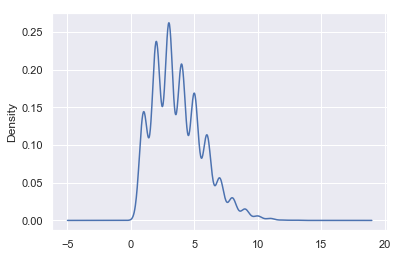

In [20]:
testing_names['assert_sum'].plot(kind='kde')

## Apply function to full dataset

In [21]:
#Rename ingredients columns before adding words columns to avoid confusion
#Adding a prefix 'ing' for each column that refers to ingredients
df.rename(columns={colname: 'ing_' + colname for colname in df.columns[8:]}, inplace=True)

In [22]:
#Drop na
df = df.dropna(subset=['product_name'])
#Apply function
df_modified = get_text_dummies(dataframe=df, dummies_list=words_to_add, text_column='product_name')

get_text_dummies running time : 21.9 mn


In [25]:
df.shape

(167548, 458)

In [26]:
df_modified.shape

(167548, 946)

## Export data

In [40]:
df_modified.to_csv(
    r'C:\Users\Antoine\Coding Bootcamp\Open Food Facts\data_training_names.csv', 
    index=False, 
    header=True
    )